##GYM EQUIPMENT RECOGNITION MODEL

#MODEL 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 359 images belonging to 10 classes.
Found 80 images belonging to 10 classes.
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1100 - loss: 2.6340 - val_accuracy: 0.0938 - val_loss: 2.2769
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.3125 - loss: 2.1997 - val_accuracy: 0.2500 - val_loss: 2.1834
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1650 - loss: 2.1912 - val_accuracy: 0.3750 - val_loss: 1.9368
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3750 - loss: 1.8218 - val_accuracy: 0.3750 - val_loss: 2.0267
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4060 - loss: 1.8308 - val_accuracy: 0.4531 - val_loss: 1.5287
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5000 - loss: 1.4519 - val_accuracy: 0.6875 - val_loss: 1.2208
Epoch 7/10
11/11 ━━━━━━━━━━━

Model saved to /content/drive/MyDrive/gym_equipment_recognition/model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 929ms/step - accuracy: 0.6562 - loss: 1.1401
Validation Loss: 1.138664722442627
Validation Accuracy: 0.65625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted class: punching-bag


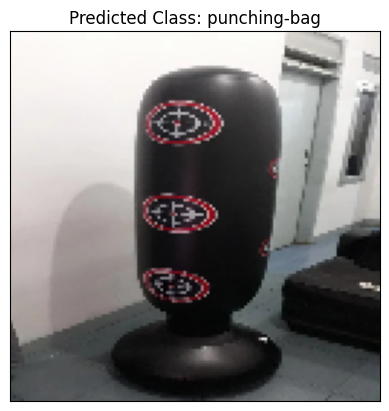

In [6]:
!pip install tensorflow #library for machine learning and deep learning
!pip install matplotlib #python library for creating visualizations

import tensorflow as tf #building and training the CNN Model
import matplotlib.pyplot as plt #display the test image
import numpy as np #library for numerical computations
from tensorflow.keras.preprocessing.image import ImageDataGenerator #helps in loading, preprocessing, and augmenting image datasets
import os #built-in os module for interacting with the file system (retrieve class labels from directory names)

#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

#Set the path to your dataset on google drive (training folder)
dataset_path = '/content/drive/MyDrive/gym_equipment_recognition/training'

#Define parameters for image loading and preprocessing
img_height, img_width = 128, 128
batch_size = 32

#Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalizes pixel values to the range [0, 1]
    shear_range=0.2, #applies shearing transformations to images
    zoom_range=0.2, #zooms into images
    horizontal_flip=True, #flips images horizontally
    validation_split=0.2 #data split: 80% training, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width), #resizes images to 128x128 pixels
    batch_size=batch_size, #groups images into batches of 32
    class_mode='categorical', #labels are one-hot encoded for multi-class classification
    subset='training' #uses the training subset
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

#Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)), # Output: (64, 64, 32)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), # Output: (32, 32, 64)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), # Output: (16, 16, 128)
    tf.keras.layers.Flatten(), # Output: (16 * 16 * 128) = 32768
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

#Save the model in H5 format
model_save_path = '/content/drive/MyDrive/gym_equipment_recognition/model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


#Evaluate the model based on Validation dataset
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

#Test the model with the provided image path
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/gym_equipment_recognition/training/punching-bag/1.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width)) #resise
img_array = image.img_to_array(img) #convert to array
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255. #normalize

prediction = model.predict(img_array) #predicts the class probabilities
predicted_class_index = np.argmax(prediction) #retrieves the index of the highest probability

#Get class labels from the directory structure (sorted)
class_labels = sorted(os.listdir(dataset_path))

print("Predicted class:", class_labels[predicted_class_index])

plt.imshow(img)
plt.title(f"Predicted Class: {class_labels[predicted_class_index]}")
plt.xticks([])
plt.yticks([])
plt.show()

##MODEL 2
CHANGES:
1. The new model uses train_generator.class_indices.keys() to ensure class labels match the generator's internal mapping.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 359 images belonging to 10 classes.
Found 80 images belonging to 10 classes.
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1112 - loss: 2.3536 - val_accuracy: 0.1875 - val_loss: 2.1851
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2812 - loss: 2.0241 - val_accuracy: 0.1875 - val_loss: 2.1070
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2910 - loss: 2.0088 - val_accuracy: 0.4844 - val_loss: 1.4810
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6875 - loss: 1.1789 - val_accuracy: 0.2500 - val_loss: 1.8770
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4860 - loss: 1.4176 - val_accuracy: 0.5156 - val_loss: 1.4349
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5938 - loss: 1.0348 - val_accuracy: 0.5000 - val_loss: 1.6656
Epoch 7/10
11/11 ━━━━━━━━━━━━

Model saved to /content/drive/MyDrive/gym_equipment_recognition/model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - accuracy: 0.7188 - loss: 1.0848
Validation Loss: 1.0826810598373413
Validation Accuracy: 0.71875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted class: punching-bag


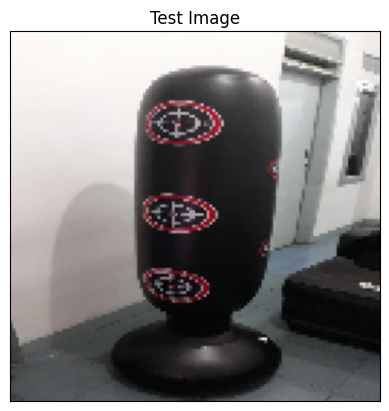

In [ ]:
!pip install tensorflow matplotlib

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset on Google Drive (training folder)
dataset_path = '/content/drive/MyDrive/gym_equipment_recognition/training'

# Define parameters for image loading and preprocessing
img_height, img_width = 128, 128
batch_size = 32

# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Output: (64, 64, 32)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Output: (32, 32, 64)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Output: (16, 16, 128)
    tf.keras.layers.Flatten(),  # Output: (16 * 16 * 128) = 32768
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model in H5 format
model_save_path = '/content/drive/MyDrive/gym_equipment_recognition/model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Test the model with the provided image path
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/gym_equipment_recognition/training/punching-bag/1.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

#Get class labels from the directory structure (sorted)
class_labels = sorted(train_generator.class_indices.keys()) #directly reflects the mapping of classes used during training

print("Predicted class:", class_labels[predicted_class_index])

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()